In [36]:
from IPython.display import HTML
HTML('''
    <style> body {font-family: "Roboto Condensed Light", "Roboto Condensed";} h2 {padding: 10px 12px; background-color: #E64626; position: static; color: #ffffff; font-size: 40px;} .text_cell_render p { font-size: 15px; } .text_cell_render h1 { font-size: 30px; } h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; position: static; color: #ffffff; font-size: 20px;} h4:before{ 
    content: "@"; font-family:"Wingdings"; font-style:regular; margin-right: 4px;} .text_cell_render h4 {padding: 8px; font-family: "Roboto Condensed Light"; position: static; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}</style>
    <script> code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script>
    <form action="javascript:code_toggle()"><input type="submit" value="Hide/show all code."></form>
''')

# Sydney Liveability Analysis

## Group - 5  F10Adv-01

In [37]:
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

In [38]:
sa2_data = gpd.read_file("SA2_2016_AUST/SA2_2016_AUST.shp")
sa2_data

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,101021007,11007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,"POLYGON ((149.58423 -35.44427, 149.58444 -35.4..."
1,101021008,11008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,"POLYGON ((149.21898 -35.36739, 149.21799 -35.3..."
2,101021009,11009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,"POLYGON ((149.21325 -35.34325, 149.21619 -35.3..."
3,101021010,11010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,"POLYGON ((149.24033 -35.34782, 149.24023 -35.3..."
4,101021011,11011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,"POLYGON ((149.23580 -35.38738, 149.23771 -35.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,901021002,91002,Cocos (Keeling) Islands,90102,Cocos (Keeling) Islands,901,Other Territories,9OTER,Other Territories,9,Other Territories,13.7163,"MULTIPOLYGON (((96.83047 -12.17636, 96.83045 -..."
2306,901031003,91003,Jervis Bay,90103,Jervis Bay,901,Other Territories,9OTER,Other Territories,9,Other Territories,67.8134,"MULTIPOLYGON (((150.69566 -35.18297, 150.69555..."
2307,901041004,91004,Norfolk Island,90104,Norfolk Island,901,Other Territories,9OTER,Other Territories,9,Other Territories,38.6509,"MULTIPOLYGON (((167.99472 -29.04534, 167.99432..."
2308,997979799,99799,Migratory - Offshore - Shipping (OT),99797,Migratory - Offshore - Shipping (OT),997,Migratory - Offshore - Shipping (OT),99799,Migratory - Offshore - Shipping (OT),9,Other Territories,0.0000,None


In [39]:
break_and_enter = gpd.read_file("break_and_enter/BreakEnterDwelling_JanToDec2021.shp")
break_and_enter

,OBJECTID,Contour,Density,ORIG_FID,Shape_Leng,Shape_Area,geometry
0,1,8.0,Low Density,1,0.012138,0.000006,"POLYGON ((149.91078 -37.06636, 149.91080 -37.0..."
1,2,8.0,Low Density,1,0.019106,0.000015,"POLYGON ((149.90601 -37.05837, 149.90602 -37.0..."
2,3,8.0,Low Density,1,0.006068,0.000002,"POLYGON ((148.94250 -37.04209, 148.94253 -37.0..."
3,4,8.0,Low Density,1,0.011006,0.000006,"POLYGON ((149.19583 -36.91833, 149.19584 -36.9..."
4,5,8.0,Low Density,1,0.008073,0.000003,"POLYGON ((149.84836 -36.68459, 149.84838 -36.6..."
...,...,...,...,...,...,...,...
2589,2590,10.0,High Density,3,0.015358,0.000011,"POLYGON ((153.27961 -28.55388, 153.27964 -28.5..."
2590,2591,10.0,High Density,3,0.028327,0.000029,"POLYGON ((150.35939 -28.60530, 150.35941 -28.6..."
2591,2592,10.0,High Density,3,0.006654,0.000002,"POLYGON ((153.56825 -28.38307, 153.56828 -28.3..."
2592,2593,10.0,High Density,3,0.047098,0.000044,"POLYGON ((153.53917 -28.18858, 153.53920 -28.1..."


In [40]:
school_catchments_future = gpd.read_file("school_catchments/catchments_future.shp")

In [41]:
school_catchments_primary = gpd.read_file("school_catchments/catchments_primary.shp")

In [42]:
school_catchments_secondary = gpd.read_file("school_catchments/catchments_secondary.shp")


In [43]:
neighbourhoods = pd.read_csv('Neighbourhoods.csv')
neighbourhoods

,Unnamed: 0,area_id,area_name,land_area,population,number_of_dwellings,number_of_businesses,median_annual_household_income,avg_monthly_rent,0-4,5-9,10-14,15-19
0,0,102011028,Avoca Beach - Copacabana,643.8000,7590,2325,738.0,46996.0,1906.0,467,583,604,560
1,1,102011029,Box Head - MacMasters Beach,3208.6000,10986,3847,907.0,42621.0,1682.0,586,696,661,692
2,2,102011030,Calga - Kulnura,76795.1000,4841,1575,1102.0,42105.0,1182.0,220,254,304,320
3,3,102011031,Erina - Green Point,3379.3000,14237,4450,1666.0,43481.0,1595.0,695,778,916,838
4,4,102011032,Gosford - Springfield,1691.2000,19385,6373,2126.0,45972.0,1382.0,1200,1079,963,977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,106011109,Cessnock Region,1570.4341,"7,931","3,281",673.0,73164.0,1080.0,432,590,577,527
318,318,106011113,Singleton Region,4067.2349,"4,919","2,055",698.0,87984.0,1000.0,310,394,353,323
319,319,111021218,Morisset - Cooranbong,330.5208,"14,959","6,298",1154.0,58084.0,1260.0,813,855,828,962
320,320,114021285,Hill Top - Colo Vale,174.3752,"6,025","2,249",400.0,81120.0,1512.0,443,500,470,451


In [44]:
BusinessStats = pd.read_csv('BusinessStats.csv')

In [45]:
Playgrounds_json = json.load(open('Playgrounds.geojson'))

Playgrounds_DataFrame = pd.DataFrame(Playgrounds_json["features"])
Playgrounds_pandas_data=[]
for index, row in Playgrounds_DataFrame.iterrows():
    append_row = [row["geometry"]["coordinates"][0],row["geometry"]["coordinates"][1],row["properties"]["Name"]]
    Playgrounds_pandas_data.append(append_row)
    
Playgrounds = pd.DataFrame(Playgrounds_pandas_data, columns = ['X', 'Y','Name'])
Playgrounds['geom'] = gpd.points_from_xy(Playgrounds.X, Playgrounds.Y)  # creating the geometry column
Playgrounds = Playgrounds.drop(columns=['X', 'Y'])  # removing the old latitude/longitude fields

In [46]:
Lights_json = json.load(open('Lights.geojson'))
Lights_DataFrame = pd.DataFrame(Lights_json["features"])
Lights_pandas_data=[]
for index, row in Lights_DataFrame.iterrows():
    append_row = [row["geometry"]["coordinates"][0],row["geometry"]["coordinates"][1],row["properties"]["Location"]]
    Lights_pandas_data.append(append_row)
    
Lights = pd.DataFrame(Lights_pandas_data, columns = ['X', 'Y','Location'])
Lights['geom'] = gpd.points_from_xy(Lights.X, Lights.Y)  # creating the geometry column
Lights = Lights.drop(columns=['X', 'Y'])  # removing the old latitude/longitude fields

In [47]:
sa2_data = sa2_data.drop(sa2_data[(sa2_data['SA4_NAME16'].str.contains("No usual address", case=False)) |
                                  (sa2_data['SA4_NAME16'].str.contains("Migratory - Offshore - Shipping", case=False)) |
                         sa2_data['SA3_NAME16'].str.contains("No usual address", case=False) |
                         sa2_data['SA3_NAME16'].str.contains("Migratory - Offshore - Shipping", case=False) |
                         sa2_data['SA2_NAME16'].str.contains("No usual address", case=False) | 
                         sa2_data['SA2_NAME16'].str.contains("Migratory - Offshore - Shipping", case=False) | 
                         sa2_data['GCC_NAME16'].str.contains("No usual address", case=False) | 
                         sa2_data['GCC_NAME16'].str.contains("Migratory - Offshore - Shipping", case=False) |
                         sa2_data['GCC_NAME16'].str.contains("Rest of", case=False)].index
                        )

sa2_data = sa2_data[sa2_data['GCC_NAME16']=='Greater Sydney'] 

In [48]:
# neighbourhoods.isnull().values.any()
# nan_rows = neighbourhoods[neighbourhoods.isnull().T.any()]
# # print(nan_rows)
neighbourhoods = neighbourhoods.drop(neighbourhoods[neighbourhoods.isnull().T.any()].index)
# neighbourhoods.get_value(319, 'population', takeable=False)
# for index, row in nan_rows.iterrows():
#     print(row)
# print(type(nan_rows))


In [49]:
for index, row in neighbourhoods.iterrows():
    old_value = row['population']
    old_value_split = str(row['population']).split(",")
    new_value = ""
    for i in old_value_split :
        new_value = new_value+i
    neighbourhoods['population'] = neighbourhoods['population'].replace([old_value],int(new_value))

#     print(row['c1'], row['c2'])

# neighbourhoods['population'] = neighbourhoods['population'].replace(['old value'],'new value')

In [50]:
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import json

credentials = "Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+'/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(sqlcmd, conn, params=args)
        else:
            result = conn.execute(sqlcmd, args).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

In [51]:
db, conn = pgconnect(credentials)

Connected successfully.


In [52]:
query(conn, "select PostGIS_Version()")

,postgis_version
0,3.0 USE_GEOS=1 USE_PROJ=1 USE_STATS=1


In [53]:
srid = 4326
Playgrounds['geom'] = Playgrounds['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
Lights['geom'] = Lights['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))

In [54]:
sa2_data = sa2_data[['SA2_MAIN16', 'SA2_NAME16','SA3_NAME16','geometry']].copy()
break_and_enter = break_and_enter[['OBJECTID', 'Density','geometry']].copy()
school_catchments_future = school_catchments_future[['USE_ID','CATCH_TYPE', 'USE_DESC','geometry']].copy()
school_catchments_primary = school_catchments_primary[['USE_ID', 'USE_DESC','geometry']].copy()
school_catchments_secondary = school_catchments_secondary[['USE_ID', 'USE_DESC','geometry']].copy()
neighbourhoods = neighbourhoods[['area_id','land_area','population', 'number_of_dwellings','number_of_businesses','median_annual_household_income','avg_monthly_rent','0-4','5-9','10-14','15-19']].copy()
BusinessStats = BusinessStats[['area_id','number_of_businesses','accommodation_and_food_services','retail_trade','agriculture_forestry_and_fishing','health_care_and_social_assistance','public_administration_and_safety','transport_postal_and_warehousing']].copy()
Lights = Lights[['Location', 'geom']].copy()
Playgrounds = Playgrounds[['Name', 'geom']].copy()

In [55]:
def create_wkt_element(geom, srid):
    if geom!=None :
        if geom.geom_type == 'Polygon':
            geom = MultiPolygon([geom])
        return WKTElement(geom.wkt, srid)

# sa2_data_og = sa2_data.copy()  # creating a copy of the original for later
sa2_data['geom'] = sa2_data['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
sa2_data = sa2_data.drop(columns="geometry")  # deleting the old copy

# break_and_enter_og = break_and_enter.copy()  # creating a copy of the original for later
break_and_enter['geom'] = break_and_enter['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
break_and_enter = break_and_enter.drop(columns="geometry")  # deleting the old copy

# school_catchments_future_og = school_catchments_future.copy()  # creating a copy of the original for later
school_catchments_future['geom'] = school_catchments_future['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
school_catchments_future = school_catchments_future.drop(columns="geometry")  # deleting the old copy

# school_catchments_primary_og = school_catchments_primary.copy()  # creating a copy of the original for later
school_catchments_primary['geom'] = school_catchments_primary['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
school_catchments_primary = school_catchments_primary.drop(columns="geometry")  # deleting the old copy

# school_catchments_secondary_og = school_catchments_secondary.copy()  # creating a copy of the original for later
school_catchments_secondary['geom'] = school_catchments_secondary['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
school_catchments_secondary = school_catchments_secondary.drop(columns="geometry")  # deleting the old copy

In [56]:
school_catchments_primary

,USE_ID,USE_DESC,geom
0,2838,Parklea PS,MULTIPOLYGON (((150.93563850416004 -33.7161211...
1,3943,Gordon WPS,MULTIPOLYGON (((151.14085043012102 -33.7446267...
2,2404,Lindfield EPS,MULTIPOLYGON (((151.1833640465581 -33.74748398...
3,4393,Carlingford WPS,MULTIPOLYGON (((151.0451821055135 -33.77303212...
4,4615,Caddies Ck PS,MULTIPOLYGON (((150.92567327976582 -33.7296030...
...,...,...,...
1661,4383,E A Southee PS,MULTIPOLYGON (((147.9462089946497 -34.55863148...
1662,3275,Tumbarumba PS,MULTIPOLYGON (((148.12885348977485 -35.6008184...
1663,2239,Jindera PS,MULTIPOLYGON (((146.86147943204122 -35.8751106...
1664,3594,Louth PS,MULTIPOLYGON (((145.18402754685187 -29.6580498...


In [57]:
# conn.execute("""
# CREATE SCHEMA IF NOT EXISTS Sydney_Liveability_Analysis;
# SET search_path TO Sydney_Liveability_Analysis;
# """)

# sa2_data
conn.execute("""
DROP TABLE IF EXISTS sa2_data;
CREATE TABLE sa2_data (
    "SA2_MAIN16" INTEGER,
    "SA2_NAME16" VARCHAR(80),
    "SA3_NAME16" VARCHAR(80),
    "geom" GEOMETRY(MULTIPOLYGON,4326)
);"""
)

# neighbourhood
conn.execute("""
DROP TABLE IF EXISTS neighbourhood;
CREATE TABLE neighbourhood (
    "area_id" INTEGER,
    "land_area" NUMERIC,
    "population" INTEGER,
    "number_of_dwellings" VARCHAR(80),
    "number_of_businesses" INTEGER,
    "median_annual_household_income" NUMERIC,
    "avg_monthly_rent" INTEGER,
    "0-4" INTEGER,
    "5-9" INTEGER,
    "10-14" INTEGER,
    "15-19" INTEGER
);"""
)

# break and enter
conn.execute("""
DROP TABLE IF EXISTS break_and_enter;
CREATE TABLE break_and_enter (
    "OBJECTID" INTEGER,
    "Density" VARCHAR(80),
    "geom" GEOMETRY(MULTIPOLYGON,4326)
);"""
)

# school_catchments_future
conn.execute("""
DROP TABLE IF EXISTS school_catchments_future;
CREATE TABLE school_catchments_future (
    "USE_ID" INTEGER, 
    "CATCH_TYPE" VARCHAR(80), 
    "USE_DESC" VARCHAR(80),
    "geom" GEOMETRY(MULTIPOLYGON,4326)
    
);"""
)

# school_catchments_primary
conn.execute("""
DROP TABLE IF EXISTS school_catchments_primary;
CREATE TABLE school_catchments_primary (
    "USE_ID" INTEGER,
    "USE_DESC" VARCHAR(80),
    "geom" GEOMETRY(MULTIPOLYGON,4326)
    
);"""
)

# school_catchments_secondary
conn.execute("""
DROP TABLE IF EXISTS school_catchments_secondary;
CREATE TABLE school_catchments_secondary (
    "USE_ID" INTEGER,
    "USE_DESC" VARCHAR(80),
    "geom" GEOMETRY(MULTIPOLYGON,4326)
    
);"""
)


# BusinessStats
conn.execute("""
DROP TABLE IF EXISTS businessstats;
CREATE TABLE businessstats (
    "area_id" INTEGER,
    "number_of_businesses" INTEGER,
    "accommodation_and_food_services" INTEGER,
    "retail_trade" INTEGER,
    "agriculture_forestry_and_fishing" INTEGER,
    "health_care_and_social_assistance" INTEGER,
    "public_administration_and_safety" INTEGER,
    "transport_postal_and_warehousing" INTEGER
);"""
)

# Playgrounds
conn.execute("""
DROP TABLE IF EXISTS playgrounds;
CREATE TABLE playgrounds (
   "Name" VARCHAR(200),
   geom GEOMETRY(POINT, 4326)
);"""
)

# Lights
conn.execute("""
DROP TABLE IF EXISTS lights;
CREATE TABLE lights (
   "Location" VARCHAR(200),
   geom GEOMETRY(POINT, 4326)
);"""
)


In [58]:
sa2_data.to_sql('sa2_data', conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [59]:
neighbourhoods.to_sql('neighbourhood', conn, if_exists='append', index=False)

In [60]:
break_and_enter.to_sql("break_and_enter", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [61]:
school_catchments_future.to_sql("school_catchments_future", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})


In [62]:
school_catchments_primary.to_sql("school_catchments_primary", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [63]:
school_catchments_secondary.to_sql("school_catchments_secondary", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})

In [64]:
BusinessStats.to_sql('businessstats', conn, if_exists='append', index=False)

In [65]:
Lights.to_sql('lights', conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})

In [66]:
Playgrounds.to_sql('playgrounds', conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})

In [67]:
# query(conn, "select * from sa2_data") # 312 Rows
# query(conn, "select * from neighbourhood") # 322 Rows
# query(conn, "select * from break_and_enter") # 2594 Rows
# query(conn, "select * from school_catchments_future") # 43 Rows
# query(conn, "select * from school_catchments_primary") # 1666 Rows
# query(conn, "select * from school_catchments_secondary") # 435 Rows
# query(conn, "select * from businessstats") # 2301 Rows
# query(conn, "select * from lights") # 8433 Rows
# query(conn, "select * from playgrounds") # 151 Rows

                                   health_care_and_social_assistance  \
SA2_NAME16                                                             
Sydney - Haymarket - The Rocks                                  1217   
Chullora                                                          11   
Badgerys Creek                                                     0   
Castle Hill - Central                                             90   
North Sydney - Lavender Bay                                      261   
...                                                              ...   
Guildford - South Granville                                      108   
Kingsgrove (North) - Earlwood                                    119   
Woolaware - Burraneer                                             53   
Newtown - Camperdown - Darlington                                360   
Prestons - Edmondson Park                                         86   

                                   population        hz        

<AxesSubplot:title={'center':'Health zscore'}>

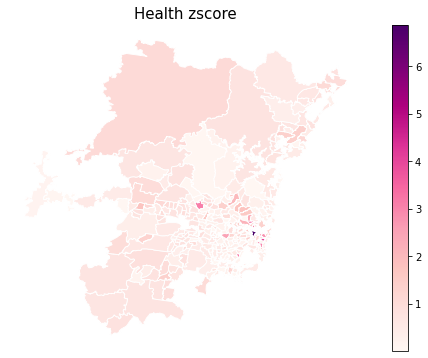

In [68]:
sql="""

with Health AS 
(SELECT avg(1000.0*b."health_care_and_social_assistance"/n."population") AS mean,
stddev(1000.0*b."health_care_and_social_assistance"/n."population") AS sd
FROM businessstats b, neighbourhood n
WHERE b."area_id" = n."area_id"),

Retail AS
(SELECT avg(1000.0*b."retail_trade"/n."population") AS mean,
stddev(1000.0*b."retail_trade"/n."population") AS sd
FROM businessstats b, neighbourhood n
WHERE b."area_id" = n."area_id"),

Accom AS
(SELECT avg(1000.0*b."accommodation_and_food_services"/n."population") AS mean,
stddev(1000.0*b."accommodation_and_food_services"/n."population") AS sd
FROM businessstats b, neighbourhood n
WHERE b."area_id" = n."area_id")

SELECT s."SA2_NAME16", b."health_care_and_social_assistance", n."population", 
abs((1000.0*b."health_care_and_social_assistance"/n."population")-Health.mean)/Health.sd AS HZ,
abs((1000.0*b."retail_trade"/n."population")-Retail.mean)/Retail.sd AS RZ,
abs((1000.0*b."accommodation_and_food_services"/n."population")-Accom.mean)/Accom.sd AS AZ

FROM sa2_data s, businessstats b, neighbourhood n, Health, Retail, Accom
WHERE s."SA2_MAIN16" = b."area_id"
AND b."area_id" = n."area_id"
ORDER BY rz desc
;
"""

q = query(conn,sql)

gdf = gpd.GeoDataFrame(q)

sa2_areas = gpd.read_file('SA2_2016_AUST/SA2_2016_AUST.shp')

merged = gdf.set_index('SA2_NAME16').join(sa2_areas.set_index('SA2_NAME16'))
print(merged)

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Health zscore', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged.plot(column='hz',
            cmap='RdPu',
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)







In [69]:
sql = """

"""

In [70]:
conn.close()
db.dispose()